<a href="https://colab.research.google.com/github/JPT35/CS430_Projects/blob/main/FinalProject_Classification_JPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression and Decision Tree Models:


# Imports

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Function used to plot the confusion matrix:

In [90]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# Function for plotting the roc_curve:

In [91]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

# Accessing frive for csv file:

In [92]:
df = pd.read_csv('/content/gdrive/MyDrive/CS-430/regseason2223clean.csv')

# Printing the head of the dataset:

In [93]:
df.head()

,Matchup,HomeSpread,Pdmargin,Pdspread,Osmarg,Osspread,Kpmar,Kpsp,Tomarg,blocks,...,fta,orbs,NF,BPI,TR,OSP,Nfp,BPIp,Kpp,marg
0,#6 Gonzaga vs. #15 St Marys,3.5,-1.719617,1.780383,-3.8,-0.3,1,4.5,0.35,-0.55,...,-2.05,0.60,-0.29,-1.7,-5.0,-5.29,0.496,0.441,51.0,-26
1,#127 Notre Dame vs. #56 VA Tech,-6.5,4.992462,-1.507538,19.1,12.6,7,0.5,-0.75,0.10,...,2.25,1.10,7.47,7.7,4.8,30.88,0.783,0.827,75.0,3
2,#158 NC-Wilmgton vs. #71 Col Charlestn,-10.0,11.470956,1.470956,11.3,1.3,8,-2.0,0.65,0.00,...,2.40,1.85,7.76,7.0,7.2,26.73,0.716,0.794,76.0,5
3,#130 GA Tech vs. #154 Florida St,2.0,-6.560043,-4.560043,-2.1,-0.1,-2,0.0,1.75,0.50,...,3.30,-1.85,-2.60,-0.9,0.6,-33.35,0.418,0.448,42.0,-1
4,#164 U Mass vs. #145 Richmond,-2.5,-5.439945,-7.939945,4.0,1.5,1,-1.5,-0.50,-1.00,...,1.45,-1.55,0.72,1.2,-3.5,-9.16,0.552,0.552,53.0,33


# Column Descriptions

    Matchup: The two teams playing against each other.

    HomeSpread: The point spread in favor of the home team.

    Pdmargin: The margin of victory/defeat for the team playing.

    Pdspread: The point spread of the game.

    Osmarg: The offensive margin for the visiting team.

    Osspread: The offensive point spread for the game.

    Kpmar: The margin of victory/defeat adjusted for strength of schedule.

    Kpsp: The point spread of the game adjusted for strength of schedule.

    Tomarg: The turnover margin for the visiting team.

    blocks: The number of blocks made by the team playing.

    steal: The number of steals made by the team playing.

    fgp: The field goal percentage of the team playing.

    fta: The free throw attempts of the team playing.

    orbs: The number of offensive rebounds made by the team playing.

    NF: The net fouls of the team playing.

    BPI: The Basketball Power Index rating of the team playing.

    TR: The team rebounds of the team playing.

    OSP: The offensive scoring percentage of the team playing.

    Nfp: The net fouls per game of the team playing.

    BPIp: The Basketball Power Index rating of the opposing team.

    Kpp: The point spread adjusted for strength of schedule for the
    opposing team.
    
    marg: The margin of victory/defeat adjusted for strength of schedule
    for the opposing team.

# Summarizing statistics of the data

In [94]:
statistics = df.describe()

print(statistics)

        HomeSpread     Pdmargin     Pdspread       Osmarg     Osspread  \
count  3508.000000  3508.000000  3508.000000  3508.000000  3508.000000   
mean     -3.512258     9.302367     5.790109     0.355844    -3.156471   
std       7.559723     9.803201     5.949606     9.842773     5.501565   
min     -39.500000   -29.276972   -29.276972   -28.800000   -26.800000   
25%      -8.000000     2.900866     2.125262    -6.400000    -6.400000   
50%      -3.500000     9.116699     5.546606     0.100000    -3.300000   
75%       2.000000    15.408211     9.342969     7.200000     0.300000   
max      21.000000    57.967747    47.272536    39.000000    26.900000   

             Kpmar         Kpsp       Tomarg       blocks        steal  ...  \
count  3508.000000  3508.000000  3508.000000  3508.000000  3508.000000  ...   
mean      3.842075     0.329818    -0.861759     0.775086     0.417588  ...   
std       7.440257     1.779145     1.796320     1.025580     1.324433  ...   
min     -20.00000

# Recoding 'Pdmargin' column so 'Win' = 1 and '*Lost*' = 0

In [103]:
df['Pdmargin'] = df['Pdmargin'].apply(lambda x: 1 if x > 0 else 0)

# Dropping unecsessary columns from dataset:

In [104]:
X = df.drop(columns=['Matchup', 'Pdmargin'])
y = df['Pdmargin']

# Splitting the dataset into training and test sets:

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating column transformer:

In [106]:
col_transform = ColumnTransformer(transformers=[
        ('num', MinMaxScaler(), ['HomeSpread', 'Pdspread', 'Osmarg', 'Osspread', 'Kpmar', 'Kpsp', 'Tomarg', 'blocks', 'steal', 'fgp', 'fta', 'orbs', 'NF', 'BPI', 'TR', 'OSP', 'Nfp', 'BPIp', 'Kpp', 'marg']),
    ])


# Creating pipeline:

In [107]:
pipeline = Pipeline([  
      ('transform', col_transform),    
      ('mlr_model', LogisticRegression(max_iter=1000))])

# Checking graphical version of pipeline

In [108]:
set_config(display = 'diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['HomeSpread', 'Pdspread',
                                                   'Osmarg', 'Osspread',
                                                   'Kpmar', 'Kpsp', 'Tomarg',
                                                   'blocks', 'steal', 'fgp',
                                                   'fta', 'orbs', 'NF', 'BPI',
                                                   'TR', 'OSP', 'Nfp', 'BPIp',
                                                   'Kpp', 'marg'])])),
                ('mlr_model', LogisticRegression(max_iter=1000))])

# Running fit into pipeline:

In [109]:
y_train = np.ravel(y_train)

# Fitting the pipeline: 

In [110]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['HomeSpread', 'Pdspread',
                                                   'Osmarg', 'Osspread',
                                                   'Kpmar', 'Kpsp', 'Tomarg',
                                                   'blocks', 'steal', 'fgp',
                                                   'fta', 'orbs', 'NF', 'BPI',
                                                   'TR', 'OSP', 'Nfp', 'BPIp',
                                                   'Kpp', 'marg'])])),
                ('mlr_model', LogisticRegression(max_iter=1000))])

# Running prediction, passing X_test into predict function:

In [111]:
y_pred = pipeline.predict(X_test)

# Evaluating model:

# R2 score:

In [112]:
r2_score(y_pred, y_test)

0.6901318925790562

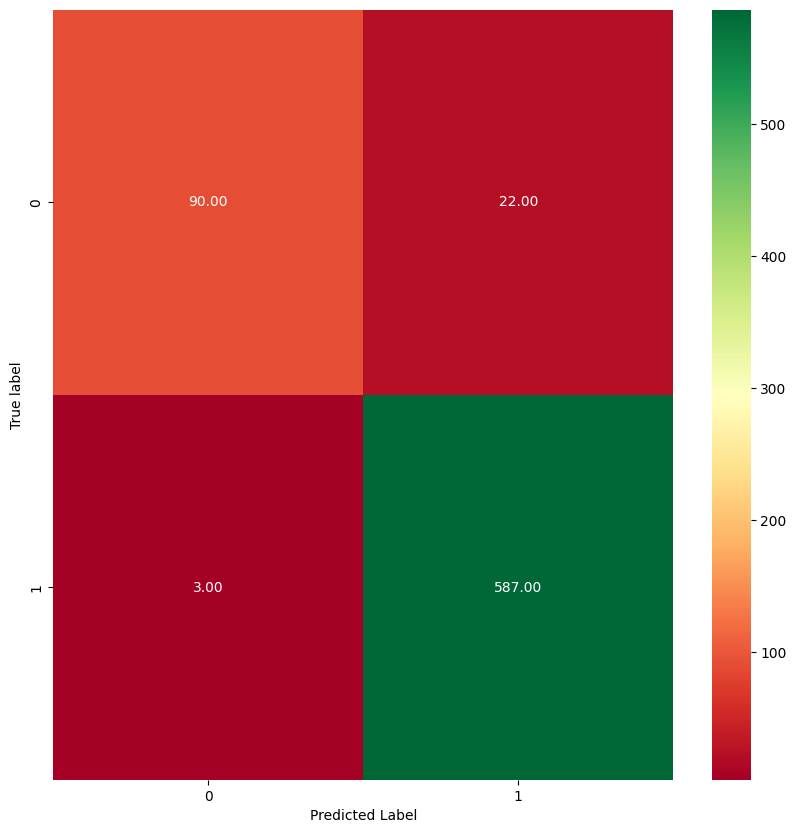

In [113]:
y_pred = pipeline.predict(X_test)

plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [114]:
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Precision: 0.964
Recall: 0.995
F1 score: 0.979


# Interpretation of results: 

The precision, recall and F1 score are all >.95 suggesting this is an effective model for determining wins and losses for home teams in the 2022-2023 college basketball season.  

The confusion matrix shows that the model is much better at predicting the true negatives for this dataset than it is at predicting true positives. For the basketball data, the true positives would be accurately predicted wins, while the true negatives would be accurately predicted losses.  This model is great for predicting a loss but less accurate at predicting a winning outcome based on the data.  

# Decision Tree

In [198]:
df = pd.read_csv('/content/gdrive/MyDrive/CS-430/Purchase_new.csv')

In [199]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier

In [200]:
df.head()

,Holiday,Discount,Free Delivery,Purchase
0,No,Yes,Yes,Yes
1,No,Yes,Yes,Yes
2,No,No,No,No
3,yes,Yes,Yes,Yes
4,yes,Yes,Yes,Yes


# Splitting data into Train/test:

In [201]:
X = df.drop(['Purchase'], axis=1)
y = df['Purchase']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Building the pipeline:

In [203]:
num_attribs = []
cat_attribs = ['Holiday', 'Discount', 'Free Delivery']

In [204]:
columnT = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs), ('cat', OneHotEncoder(), cat_attribs)])

In [205]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [206]:
pipeline = Pipeline(steps=[('columnT', columnT), ('classifier', dtc)])

In [207]:
print(df.columns)

Index(['Holiday', 'Discount', 'Free Delivery', 'Purchase'], dtype='object')


# Fitting pipeline:

In [208]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columnT',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(), []),
                                                 ('cat', OneHotEncoder(),
                                                  ['Holiday', 'Discount',
                                                   'Free Delivery'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10))])

# Running pipeline:

In [209]:
y_pred = pipeline.predict(X_test)

# Plotting CM, getting recall, precision and F1

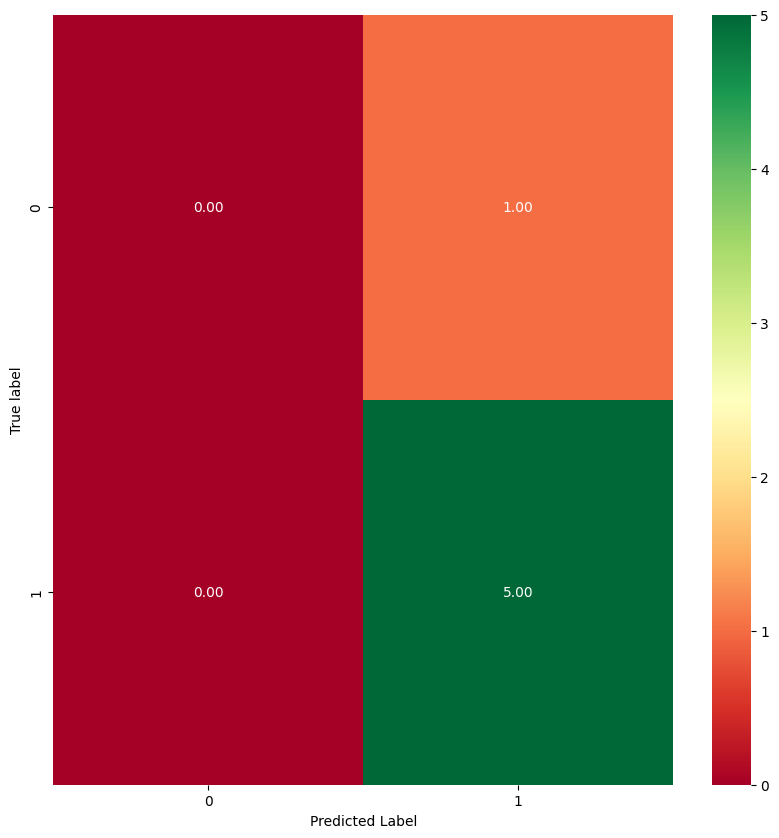

In [214]:
plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

In [211]:
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Precision: 0.964
Recall: 0.995
F1 score: 0.979


# Interpretation of reults:

Using an decision tree classification model seems to work sufficiently for this dataset.  The precision, recall and F1 scores are all above .95.  The confusion matrix shows that this model correctly identified true negatives and had one false positive result.  The size of this dataset is an issue however, and I woulnd't trust interpretations made from a dataset that is this small for any practical use.  